# Вальчевський Павло, ОІ-21сп, Варіант 2, ПР № 2

##### Переклад назви характеристик даних (для розуміння з якими даними буду працювати):
1)	Region - Регіон
2)	Island - Острів
3)	Stage - Стадія
4)	Individual ID - Ідентифікаційний номер
5)	Clutch Completion - Завершення кладки
6)	Date Egg - Дата яйця
7)	Culmen Length (mm) - Довжина дзьоба (мм)
8)	Culmen Depth (mm) - Глибина дзьоба (мм)
9)	Flipper Length (mm) - Довжина плавця (мм)
10)	Body Mass (g) - Маса тіла (г)
11)	Sex - Стать
12)	Delta 15 N (o/oo) - Дельта 15 N (о/оо)
13)	Delta 13 C (o/oo) - Дельта 13 C (о/оо)
14)	Comment - Коментар
15)	Species - Вид пінгвінів у регіоні


In [61]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ds = pd.read_csv("./variant_2.csv")
print('Кількість стовпців: ', len(ds.columns))
print('Стовпці: ', list(ds.columns))

Кількість стовпців:  18
Стовпці:  ['Unnamed: 0', 'studyName', 'Sample Number', 'Region', 'Island', 'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments', 'Species']


## Підрахунок кількості пропущених даних

In [63]:
missing = []

for col in ds.columns:
    if ds[col].isnull().sum() != 0:
        print(col, ds[col].isnull().sum())
        missing.append(col)


Island 45
Stage 4
Individual ID 45
Clutch Completion 4
Sex 45
Comments 35


In [64]:
print('Кількість записів та кількість стовпців', ds.shape)

Кількість записів та кількість стовпців (456, 18)


## Заміна відсутніх значень
- категоріальні ознаки - заповнення модою (найбільш популярним значенням)
- унікальні значення або текстові дані - умовними значеннями, що характеризують відсутність даних

In [66]:
# Функція для заміни відсутніх значень
def impute_na(df, variable, value):
    return df[variable].fillna(value)

# Заповнення модою для категоріальних стовпців
ds['Island'] = impute_na(ds, 'Island', ds['Island'].mode()[0])
ds['Stage'] = impute_na(ds, 'Stage', ds['Stage'].mode()[0])
ds['Clutch Completion'] = impute_na(ds, 'Clutch Completion', ds['Clutch Completion'].mode()[0])

# Заповнення умовними значеннями для стовпців з текстовими даними
ds['Individual ID'] = impute_na(ds, 'Individual ID', 'Unknown_ID')
ds['Sex'] = impute_na(ds, 'Sex', 'Unknown')
ds['Comments'] = impute_na(ds, 'Comments', 'No Comments')

# Заміна даних для статі з крапкою
ds['Sex'] = ds['Sex'].replace('.', 'Unknown')

# Видалення 1-го стовпця без назви і повтором Sample Number
ds = ds.drop(ds.columns[0], axis=1)

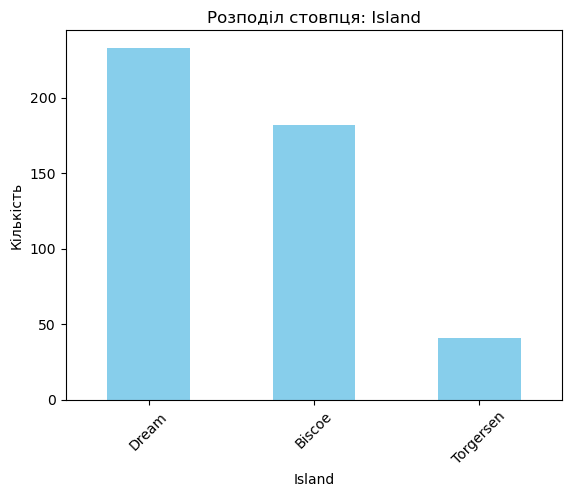

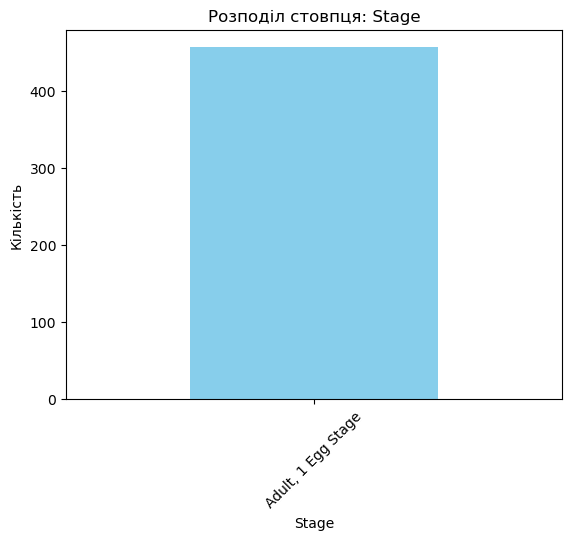

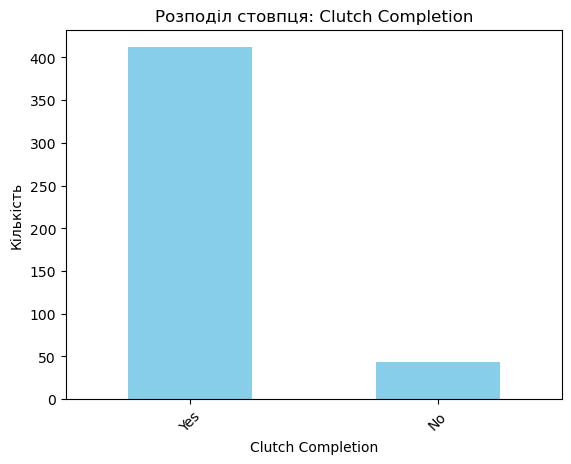

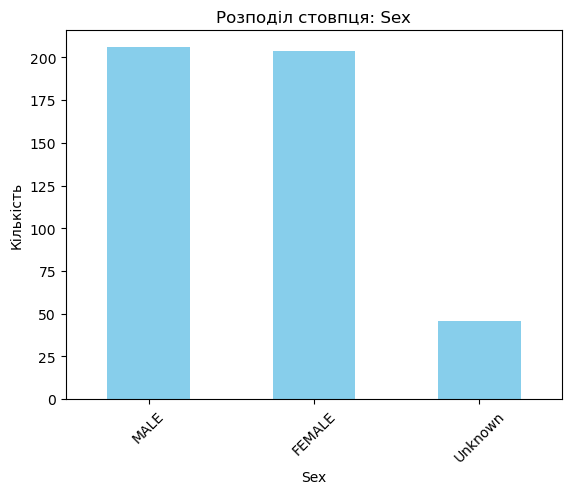

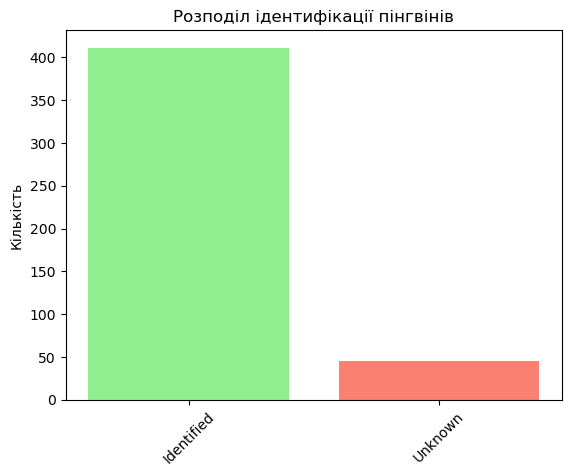

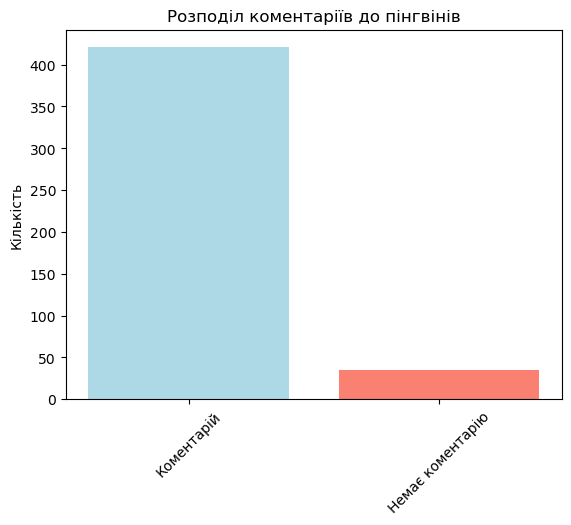

In [67]:
# Побудова гістограм для Island, stage, clutch completion, sex
def plot_categorical_distribution(df, column_name):
    df[column_name].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Розподіл стовпця: {column_name}')
    plt.ylabel('Кількість')
    plt.xlabel(column_name)
    plt.xticks(rotation=45)
    plt.show()

# Побудова гістограми для ідентифікованих та не ідентифікованих пінгвінів 
def plot_identified_penguins(df):
    identified_counts = df['Individual ID'].value_counts()
    unknown_count = identified_counts.get('Unknown_ID', 0)
    identified_count = len(df) - unknown_count
    labels = ['Identified', 'Unknown']
    counts = [identified_count, unknown_count]
    plt.bar(labels, counts, color=['lightgreen', 'salmon'])
    plt.title('Розподіл ідентифікації пінгвінів')
    plt.ylabel('Кількість')
    plt.xticks(rotation=45)
    plt.show()

def plot_comments_distribution(df):
    comments_counts = df['Comments'].value_counts()
    no_comments_count = comments_counts.get('No Comments', 0)
    with_comments_count = len(df) - no_comments_count
    labels = ['Коментарій', 'Немає коментарію']
    counts = [with_comments_count, no_comments_count]
    plt.bar(labels, counts, color=['lightblue', 'salmon'])
    plt.title('Розподіл коментаріїв до пінгвінів')
    plt.ylabel('Кількість')
    plt.xticks(rotation=45)
    plt.show()

plot_categorical_distribution(ds, 'Island')
plot_categorical_distribution(ds, 'Stage')
plot_categorical_distribution(ds, 'Clutch Completion')
plot_categorical_distribution(ds, 'Sex')
plot_identified_penguins(ds)
plot_comments_distribution(ds)

## Кодування категоріальних ознак

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
# Кількість унікальних значень у кожному стовпці:
ds.nunique()

studyName                3
Sample Number          456
Region                   1
Island                   3
Stage                    1
Individual ID          185
Clutch Completion        2
Date Egg                50
Culmen Length (mm)     268
Culmen Depth (mm)      188
Flipper Length (mm)    153
Body Mass (g)          166
Sex                      3
Delta 15 N (o/oo)      339
Delta 13 C (o/oo)      331
Comments                 7
Species                  3
dtype: int64

In [71]:
# Унікальні значення усіх стовпців
for col in ds.columns:
    print(col, '->', ds[col].unique())

studyName -> ['PAL0708' 'PAL0809' 'PAL0910']
Sample Number -> [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 2

In [72]:
# One-Hot Encoding для всіх стовпців (бібліотека Pandas)
encoded_data = pd.get_dummies(ds)

# Вивід результату
print("One-Hot Encoded для усіх стовпців:")
print(encoded_data.head())

One-Hot Encoded для усіх стовпців:
   Sample Number  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0              0                39.1               18.7                181.0   
1              1                39.5               17.4                186.0   
2              2                40.3               18.0                195.0   
3              3                41.1               17.0                190.0   
4              4                36.7               19.3                193.0   

   Body Mass (g)  Delta 15 N (o/oo)  Delta 13 C (o/oo)  studyName_PAL0708  \
0         3750.0            7.63220          -27.01854               True   
1         3800.0            8.94956          -24.69454               True   
2         3250.0            8.36821          -25.33302               True   
3         3800.0            7.63220          -27.01854               True   
4         3450.0            8.76651          -25.32426               True   

   studyName_PAL0809 

In [73]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto',
                         drop='first',  # видалення першого стовпця, щоб уникнути багатократності
                         sparse_output=False, 
                         handle_unknown='error')

# Вибір категоріальних стовпців для кодування
categorical_columns = ['Island', 'Stage', 'Clutch Completion', 'Sex', 'Comments', 'Individual ID']

# Заповнення пропущених значень
ds_filled = ds[categorical_columns].fillna('Unknown')

# Закодування даних
encoded_data = encoder.fit_transform(ds_filled)

# Створення нового датафрейму з закодованими даними
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

print("One-Hot Encoded для категоріальних стовпців:")
print(encoded_df.head())

# Об'єднуємо оригінальний датафрейм з закодованими даними
decoded_df = pd.concat([ds, encoded_df], axis=1)

# Вивід результату
print("Декодування даних:")
print(decoded_df.head())



One-Hot Encoded для категоріальних стовпців:
   Island_Dream  Island_Torgersen  Clutch Completion_Yes  Sex_MALE  \
0           0.0               1.0                    1.0       0.0   
1           0.0               1.0                    1.0       0.0   
2           1.0               0.0                    1.0       0.0   
3           1.0               0.0                    1.0       0.0   
4           0.0               1.0                    1.0       0.0   

   Sex_Unknown  \
0          1.0   
1          0.0   
2          0.0   
3          1.0   
4          0.0   

   Comments_Nest never observed with full clutch. Not enough blood for isotopes.  \
0                                                0.0                               
1                                                0.0                               
2                                                0.0                               
3                                                0.0                               
4    

## Обробка аномальних значень
### Обробка числових стовпців

In [75]:
# Функція для виявлення та обробки аномальних значень числових стовпців
def handle_outliers(df, column):
    # Визначення меж IQR (міжквартального діапазону)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Визначення меж
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Виявлення аномальних значень
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Вивід аномальних значень
    print(f"Aномальні значення для {column}:")
    print(outliers)

    # Обробка аномальних значень
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])

    return df

# Числові стовпці для опрацювання
numerical_columns = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

# Обробка аномальних значень для кожного числового стовпця
for col in numerical_columns:
    ds = handle_outliers(ds, col)

print("Оновлені дані числових стовпців без аномальних значень:")
print(ds.head())

Aномальні значення для Culmen Length (mm):
Empty DataFrame
Columns: [studyName, Sample Number, Region, Island, Stage, Individual ID, Clutch Completion, Date Egg, Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), Body Mass (g), Sex, Delta 15 N (o/oo), Delta 13 C (o/oo), Comments, Species]
Index: []
Aномальні значення для Culmen Depth (mm):
Empty DataFrame
Columns: [studyName, Sample Number, Region, Island, Stage, Individual ID, Clutch Completion, Date Egg, Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), Body Mass (g), Sex, Delta 15 N (o/oo), Delta 13 C (o/oo), Comments, Species]
Index: []
Aномальні значення для Flipper Length (mm):
Empty DataFrame
Columns: [studyName, Sample Number, Region, Island, Stage, Individual ID, Clutch Completion, Date Egg, Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), Body Mass (g), Sex, Delta 15 N (o/oo), Delta 13 C (o/oo), Comments, Species]
Index: []
Aномальні значення для Body Mass (g):
Empty DataFrame
Columns: [studyName

### Обробка текстових (категоріальних) стовпців

In [77]:
# Функція для виявлення та обробки аномальних значень у текстових даних
def handle_text_outliers(df, column):
    # Виведення унікальних значень
    unique_values = df[column].unique()
    print(f"Унікальні значення для {column}: {unique_values}")

    most_frequent = df[column].mode()[0]
    df[column] = df[column].replace(['Unknown', ''], most_frequent)  # Заміна 'Unknown' або пустих значень на найчастіше значення

    return df

# Вибір текстових (категоріальних) стовпців для опрацювання
text_columns = ['Island', 'Stage', 'Clutch Completion', 'Sex', 'Comments', 'Individual ID']

# Обробка аномальних значень для кожного текстового (категоріального) стовпця
for col in text_columns:
    ds = handle_text_outliers(ds, col)

print("Оновлений DataFrame без аномальних значень у текстових (категоріальних) стовпцях:")
print(ds.head())

# Збереження даних в окремий файл
ds.to_csv("./variant_2_new.csv", index=False)

Унікальні значення для Island: ['Torgersen' 'Dream' 'Biscoe']
Унікальні значення для Stage: ['Adult, 1 Egg Stage']
Унікальні значення для Clutch Completion: ['Yes' 'No']
Унікальні значення для Sex: ['Unknown' 'FEMALE' 'MALE']
Унікальні значення для Comments: ['Not enough blood for isotopes.' 'Nest never observed with full clutch.'
 'No Comments' 'No blood sample obtained.'
 'No blood sample obtained for sexing.'
 'Nest never observed with full clutch. Not enough blood for isotopes.'
 'Sexing primers did not amplify. Not enough blood for isotopes.']
Унікальні значення для Individual ID: ['N1A1' 'N1A2' 'N2A1' 'Unknown_ID' 'N3A1' 'N3A2' 'N4A1' 'N4A2' 'N5A1'
 'N5A2' 'N6A2' 'N7A2' 'N8A1' 'N8A2' 'N9A1' 'N9A2' 'N10A1' 'N11A1' 'N11A2'
 'N12A1' 'N12A2' 'N13A1' 'N13A2' 'N17A1' 'N17A2' 'N18A1' 'N18A2' 'N21A1'
 'N21A2' 'N22A1' 'N22A2' 'N23A1' 'N23A2' 'N24A1' 'N24A2' 'N25A1' 'N25A2'
 'N26A1' 'N26A2' 'N27A1' 'N27A2' 'N28A1' 'N28A2' 'N29A1' 'N29A2' 'N30A1'
 'N30A2' 'N32A1' 'N34A1' 'N34A2' 'N35A1' 'N3

## Масштабування даних
- Масштабування даних буде для числових стовпців і буде використовуватись метод MinMaxScaler, який перетворить значення у діапазоні [0; 1], що дозволить дані легше порівнювати між собою.

In [79]:
from sklearn.preprocessing import MinMaxScaler

# Вибір числових стовпців для масштабування
numeric_columns = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

# Створення об'єкта MinMaxScaler
scaler = MinMaxScaler()

ds[numeric_columns] = scaler.fit_transform(ds[numeric_columns])

# Вивід перших 5 рядків після масштабування
print(ds[numeric_columns].head())

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0            0.254545           0.666667             0.152542       0.291667   
1            0.269091           0.511905             0.237288       0.305556   
2            0.298182           0.583333             0.389831       0.152778   
3            0.327273           0.464286             0.305085       0.305556   
4            0.167273           0.738095             0.355932       0.208333   

   Delta 15 N (o/oo)  Delta 13 C (o/oo)  
0           0.000000           0.000000  
1           0.426493           0.719311  
2           0.238282           0.521692  
3           0.000000           0.000000  
4           0.367231           0.524404  


# Обгрунтування методів інженерії даних (також, висновки):
## Обробка відсутніх значень
- Замінювання відсутніх значень модою для категоріальних стовпців і умовними значеннями для текстових стовпців.
## Кодування категоріальних ознак
- Використання методу One-Hot Encoding для перетворення категоріальних або текстових даних у числовий формат, що дозволяє їх використовувати для подальших обрахунків і ніяк не впливати на саму категорію (це та ж категорія, але у числовому вигляді).
## Обробка аномальних значень
- Виявлення аномалій за допомогою описової статистики, таких як IQR (міжквартальний діапазон) для числових стовпців. Для категоріальних (текстових) стовпців заміна анамолій на моду (найбільш популярне значення).
## Масштабування ознак
- Масштабування даних буде для числових стовпців і буде використовуватись метод MinMaxScaler, який перетворить значення у діапазоні [0; 1], що дозволить дані легше порівнювати між собою. 